## Final Project Submission

Please fill out:
* Student name: Abdulrahman Aber, Benjamin Bai, Charles Pan, Kevin Rivera
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: David Elliott
* Blog post URL:


# Imports

In [61]:
from zipfile import ZipFile
# specifying the zip file name
file_name = "./zippedData/im.db.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Extracting all the files now...
Done!


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3 as sq
import statistics as st
import seaborn as sns
from datetime import datetime
conn = sq.connect('./im.db')
cur = conn.cursor()

# IMDB Movies DF
- Remove Columns: Unnamed: 0, TBD

In [63]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
tmdb_movies=tmdb_movies_df.dropna()
tmdb_movies.rename(columns={"original_title":"movie"}, inplace = True)
tmdb_movies.head()


,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# TN Movie Budgets DF
Remove Columns: None

In [64]:
tn_movie_budgets_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_movies = tn_movie_budgets_df.dropna()

e = tn_movies.merge(tmdb_movies, how='inner', on='movie')

e['worldwide_gross'] = e['worldwide_gross'].replace('[\$,]', '', regex=True)

e['domestic_gross'] = e['domestic_gross'].replace('[\$,]', '', regex=True)

e['production_budget'] = e['production_budget'].replace('[\$,]', '', regex=True)

e['worldwide_gross'] = e['worldwide_gross'].astype(float)

e['domestic_gross'] = e['domestic_gross'].astype(int)

e['production_budget']=e['production_budget'].astype(int)

e["net_income"]=e['worldwide_gross']-e['production_budget']

e.drop_duplicates(subset=['movie'], inplace=True)

e["ROI"]=((e['net_income'])/(e['production_budget']))*100

e['ROI'] =e['ROI'].astype(int)

e["release_date_y"] = pd.to_datetime(e["release_date_y"])

e['year'] = pd.DatetimeIndex(e['release_date_y']).year
e['month'] = pd.DatetimeIndex(e['release_date_y']).month

e_modern_2010 = e[(e['production_budget'] > 1000000) & (e['year'] >= 2010)]

In [76]:
ROI = [x for x in e_modern_2010['ROI']] 
Month = [x for x in e_modern_2010['month']]
ROI_Month = list(map(lambda *x: x, Month, ROI))

def month_mean(num):
    x = []
    for index, tuple in enumerate(ROI_Month):
        element_one = tuple[0]
        element_two = tuple[1]
        if element_one == num:
            x.append(element_two)
    return(st.mean(x))

def month_median(num):
    x = []
    for index, tuple in enumerate(ROI_Month):
        element_one = tuple[0]
        element_two = tuple[1]
        if element_one == num:
            x.append(element_two)
    return(st.median(x))

In [77]:
month_index = [1,2,3,4,5,6,7,8,9,10,11,12]
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
new1 = dict(map(lambda *x: x, month_index, month_list))
by_month_mean_list = []
by_month_median_list = []
for num in new1.keys():
    by_month_mean_list.append(month_mean(num))
    by_month_median_list.append(month_median(num))

In [78]:
month_mean = dict(map(lambda *x: x, month_list, by_month_mean_list))
month_median = dict(map(lambda *x: x, month_list, by_month_median_list))

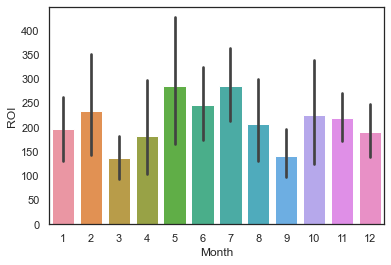

In [79]:
df = pd.DataFrame({'Month': Month,
                   'ROI': ROI,})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='ROI',  data=df);

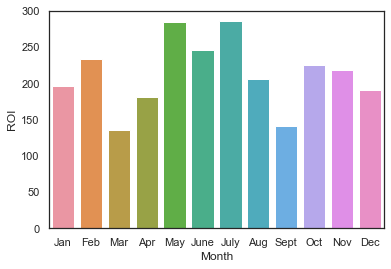

In [80]:
df1 = pd.DataFrame({'Month': month_mean.keys(),
                   'ROI': month_mean.values(),})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='ROI',  data=df1);

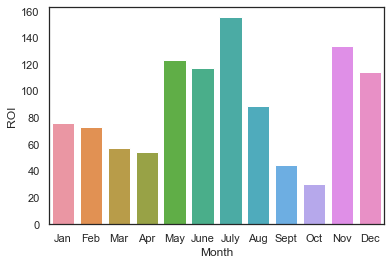

In [81]:
df2 = pd.DataFrame({'Month': month_median.keys(),
                   'ROI': month_median.values(),})
#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Month', y='ROI',  data=df2);